In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [2]:
df=pd.read_csv(r"F:\Jupyter\data_jobs.csv")
df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [4]:
#Drop Nan values before plotting

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US['salary_year_avg'].sample(10)

312025     81047.000000
304941    115000.000000
211169     61250.000000
731732     51362.640625
307041    150000.000000
189136     67500.000000
516947    108500.000000
168214     90000.000000
377892     45000.000000
722380     51082.800781
Name: salary_year_avg, dtype: float64

<Axes: >

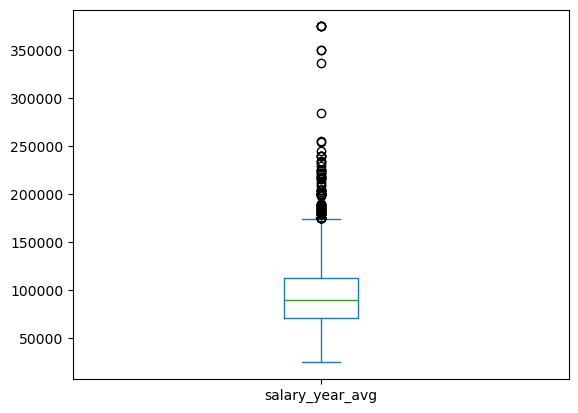

In [6]:
#Plotting simple boxplot 
df_DA_US['salary_year_avg'].plot(kind='box')

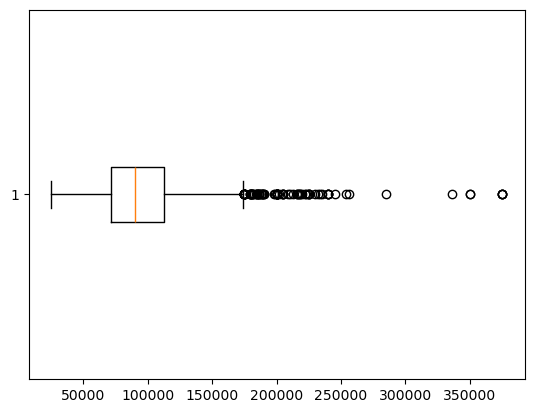

In [13]:
#Matplotlib way of plotting

plt.boxplot(df_DA_US['salary_year_avg'],vert=False)
plt.show()


In [14]:
#Now we are gonna compare salaries for different job titles in US

In [15]:
job_titles = ['Data Analyst' , 'Data Scientist', 'Data Engineer']

df_US = df[(df['job_title_short'].isin(job_titles) ) & (df['job_country'] == 'United States')].copy()

In [16]:
df_US['job_title_short'].value_counts()

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [17]:
#we have lots of Nan values in salary year avg column.Drop it

df_US=df_US.dropna(subset=['salary_year_avg'])
df_US['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64

In [18]:
#Now we only have ['Data Analyst' , 'Data Scientist', 'Data Engineer'] columns with salaries

df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",NaN,NaN
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [19]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']    for job_title in job_titles]
job_list

[109        89000.0
 180        90250.0
 410       133285.0
 988        62623.0
 1413       71300.0
             ...   
 782637     70000.0
 782798    111175.0
 783588    125000.0
 783866    115000.0
 784882     87500.0
 Name: salary_year_avg, Length: 4350, dtype: float64,
 100       228222.0
 116       114000.0
 257       103128.0
 450       157500.0
 1257       70700.0
             ...   
 785324    234500.0
 785488    115000.0
 785563    136400.0
 785648    221875.0
 785692    157500.0
 Name: salary_year_avg, Length: 4553, dtype: float64,
 92        120000.0
 146       129500.0
 307       185000.0
 339       195000.0
 380        97500.0
             ...   
 783111    125000.0
 784102     90000.0
 784191    217500.0
 785624    139216.0
 785641    150000.0
 Name: salary_year_avg, Length: 2915, dtype: float64]

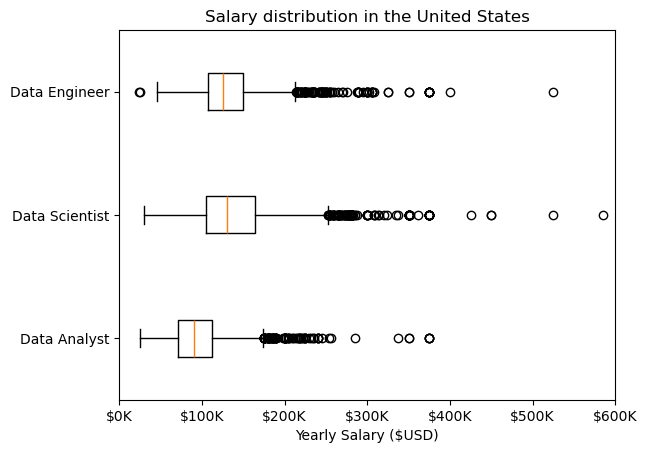

In [23]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg']    for job_title in job_titles]

plt.boxplot(job_list,labels=job_titles,vert=False)
plt.title('Salary distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()